In [262]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

import dask
from dask.diagnostics import ProgressBar

# Read data files

Need to run this section to open data files before running any later sections. (later sections are somewhat independent and can be run in any order). Even though xarray/dask only loads the metadata and opens the file descriptor, it can still take many minutes because there are too many files.

In [16]:
!du -sh /n/scratchlfs/ac290r/p2_data_postprocess/*

47G	/n/scratchlfs/ac290r/p2_data_postprocess/re10_pe1
46G	/n/scratchlfs/ac290r/p2_data_postprocess/re10_pe10_wrong_boundary
46G	/n/scratchlfs/ac290r/p2_data_postprocess/re10_pe1_wrong_boundary
1.2G	/n/scratchlfs/ac290r/p2_data_postprocess/re10_pe3
18G	/n/scratchlfs/ac290r/p2_data_postprocess/re5_pe1
18G	/n/scratchlfs/ac290r/p2_data_postprocess/re5_pe10_wrong_pe
5.8G	/n/scratchlfs/ac290r/p2_data_postprocess/re5_pe1_backup
14G	/n/scratchlfs/ac290r/p2_data_postprocess/re5_pe3
4.0K	/n/scratchlfs/ac290r/p2_data_postprocess/README


In [17]:
!ls /n/scratchlfs/ac290r/p2_data_postprocess/re5_pe1/blood/ | head -n 5  # frequency

blood_00001000.nc
blood_00006000.nc
blood_00011000.nc
blood_00016000.nc
blood_00021000.nc


In [2]:
def add_time_label(ds, step=5000, offset=1000):
    '''
    ds: Xarray Dataset or DataArray, will be modified in-place
    '''
    ds.coords['time'] = np.arange(0, ds.sizes['time']) * step + offset

## Re = 5 cases

### Blood field re5

In [7]:
%time ds_re5pe1 = xr.open_mfdataset('/n/scratchlfs/ac290r/p2_data_postprocess/re5_pe1/blood/blood_*.nc', concat_dim='time')
add_time_label(ds_re5pe1)

CPU times: user 11.8 s, sys: 5.7 s, total: 17.5 s
Wall time: 3min


In [8]:
ds_re5pe1

<xarray.Dataset>
Dimensions:     (time: 800, x: 49, y: 49, z: 492)
Coordinates:
  * x           (x) int64 3 4 5 6 7 8 9 10 11 12 ... 43 44 45 46 47 48 49 50 51
  * y           (y) int64 3 4 5 6 7 8 9 10 11 12 ... 43 44 45 46 47 48 49 50 51
  * z           (z) int64 1 6 7 8 9 10 11 12 ... 489 490 491 492 493 494 495 498
  * time        (time) int64 1000 6000 11000 16000 ... 3986000 3991000 3996000
Data variables:
    density     (time, x, y, z) float32 dask.array<shape=(800, 49, 49, 492), chunksize=(1, 49, 49, 492)>
    velocity_x  (time, x, y, z) float32 dask.array<shape=(800, 49, 49, 492), chunksize=(1, 49, 49, 492)>
    velocity_y  (time, x, y, z) float32 dask.array<shape=(800, 49, 49, 492), chunksize=(1, 49, 49, 492)>
    velocity_z  (time, x, y, z) float32 dask.array<shape=(800, 49, 49, 492), chunksize=(1, 49, 49, 492)>

In [9]:
%time ds_re5pe3 = xr.open_mfdataset('/n/scratchlfs/ac290r/p2_data_postprocess/re5_pe3/blood/blood_*.nc', concat_dim='time')
add_time_label(ds_re5pe3)

CPU times: user 8.77 s, sys: 3.87 s, total: 12.6 s
Wall time: 2min 15s


In [10]:
ds_re5pe3

<xarray.Dataset>
Dimensions:     (time: 602, x: 49, y: 49, z: 492)
Coordinates:
  * x           (x) int64 3 4 5 6 7 8 9 10 11 12 ... 43 44 45 46 47 48 49 50 51
  * y           (y) int64 3 4 5 6 7 8 9 10 11 12 ... 43 44 45 46 47 48 49 50 51
  * z           (z) int64 1 6 7 8 9 10 11 12 ... 489 490 491 492 493 494 495 498
  * time        (time) int64 1000 6000 11000 16000 ... 2996000 3001000 3006000
Data variables:
    density     (time, x, y, z) float32 dask.array<shape=(602, 49, 49, 492), chunksize=(1, 49, 49, 492)>
    velocity_x  (time, x, y, z) float32 dask.array<shape=(602, 49, 49, 492), chunksize=(1, 49, 49, 492)>
    velocity_y  (time, x, y, z) float32 dask.array<shape=(602, 49, 49, 492), chunksize=(1, 49, 49, 492)>
    velocity_z  (time, x, y, z) float32 dask.array<shape=(602, 49, 49, 492), chunksize=(1, 49, 49, 492)>

### Drug field re5

In [11]:
%time drug_re5pe1 = xr.open_mfdataset('/n/scratchlfs/ac290r/p2_data_postprocess/re5_pe1/drug/drug_*.nc', concat_dim='time')['density']
add_time_label(drug_re5pe1)

CPU times: user 7.2 s, sys: 2.34 s, total: 9.54 s
Wall time: 1min 56s


In [12]:
drug_re5pe1

<xarray.DataArray 'density' (time: 800, x: 49, y: 49, z: 492)>
dask.array<shape=(800, 49, 49, 492), dtype=float32, chunksize=(1, 49, 49, 492)>
Coordinates:
  * x        (x) int64 3 4 5 6 7 8 9 10 11 12 ... 42 43 44 45 46 47 48 49 50 51
  * y        (y) int64 3 4 5 6 7 8 9 10 11 12 ... 42 43 44 45 46 47 48 49 50 51
  * z        (z) int64 1 6 7 8 9 10 11 12 13 ... 489 490 491 492 493 494 495 498
  * time     (time) int64 1000 6000 11000 16000 ... 3986000 3991000 3996000

In [13]:
%time drug_re5pe3 = xr.open_mfdataset('/n/scratchlfs/ac290r/p2_data_postprocess/re5_pe3/drug/drug_*.nc', concat_dim='time')['density']
add_time_label(drug_re5pe3)

CPU times: user 5.64 s, sys: 1.6 s, total: 7.24 s
Wall time: 1min 16s


In [14]:
drug_re5pe3

<xarray.DataArray 'density' (time: 610, x: 49, y: 49, z: 492)>
dask.array<shape=(610, 49, 49, 492), dtype=float32, chunksize=(1, 49, 49, 492)>
Coordinates:
  * x        (x) int64 3 4 5 6 7 8 9 10 11 12 ... 42 43 44 45 46 47 48 49 50 51
  * y        (y) int64 3 4 5 6 7 8 9 10 11 12 ... 42 43 44 45 46 47 48 49 50 51
  * z        (z) int64 1 6 7 8 9 10 11 12 13 ... 489 490 491 492 493 494 495 498
  * time     (time) int64 1000 6000 11000 16000 ... 3036000 3041000 3046000

### Constants re5

In [15]:
halfx_re5 = ds_re5pe1.sizes['x']//2
halfx_re5

24

## Re = 10 cases

### Blood field re10

In [5]:
%time ds_re10pe1 = xr.open_mfdataset('/n/scratchlfs/ac290r/p2_data_postprocess/re10_pe1/blood/blood_*.nc', concat_dim='time')
add_time_label(ds_re10pe1)

CPU times: user 3.85 s, sys: 1.69 s, total: 5.54 s
Wall time: 1min 13s


In [18]:
ds_re10pe1

<xarray.Dataset>
Dimensions:     (time: 256, x: 99, y: 99, z: 990)
Coordinates:
  * x           (x) int64 3 4 5 6 7 8 9 10 11 ... 93 94 95 96 97 98 99 100 101
  * y           (y) int64 3 4 5 6 7 8 9 10 11 ... 93 94 95 96 97 98 99 100 101
  * z           (z) int64 6 7 8 9 10 11 12 13 ... 989 990 991 992 993 994 995
  * time        (time) int64 1000 6000 11000 16000 ... 1266000 1271000 1276000
Data variables:
    density     (time, x, y, z) float32 dask.array<shape=(256, 99, 99, 990), chunksize=(1, 99, 99, 990)>
    velocity_x  (time, x, y, z) float32 dask.array<shape=(256, 99, 99, 990), chunksize=(1, 99, 99, 990)>
    velocity_y  (time, x, y, z) float32 dask.array<shape=(256, 99, 99, 990), chunksize=(1, 99, 99, 990)>
    velocity_z  (time, x, y, z) float32 dask.array<shape=(256, 99, 99, 990), chunksize=(1, 99, 99, 990)>

### Drug field re10

In [3]:
%time drug_re10pe1 = xr.open_mfdataset('/n/scratchlfs/ac290r/p2_data_postprocess/re10_pe1/drug/drug_*.nc', concat_dim='time')['density']
add_time_label(drug_re10pe1)

CPU times: user 2.25 s, sys: 1.9 s, total: 4.15 s
Wall time: 51.6 s


In [4]:
drug_re10pe1

<xarray.DataArray 'density' (time: 256, x: 99, y: 99, z: 990)>
dask.array<shape=(256, 99, 99, 990), dtype=float32, chunksize=(1, 99, 99, 990)>
Coordinates:
  * x        (x) int64 3 4 5 6 7 8 9 10 11 12 ... 93 94 95 96 97 98 99 100 101
  * y        (y) int64 3 4 5 6 7 8 9 10 11 12 ... 93 94 95 96 97 98 99 100 101
  * z        (z) int64 6 7 8 9 10 11 12 13 ... 988 989 990 991 992 993 994 995
  * time     (time) int64 1000 6000 11000 16000 ... 1266000 1271000 1276000

### Constants re10

In [6]:
halfx_re10 = ds_re10pe1.sizes['x']//2
halfx_re10

49

# Global configuration for plotting

In [37]:
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 15

# Plot y-z cross-section

## Static y-z plot

### Blood field static y-z

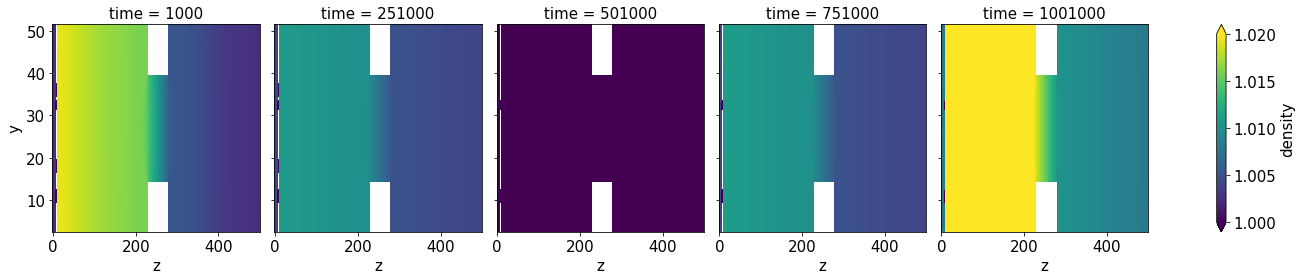

In [40]:
ds_re5pe1['density'].isel(time=[0, 50, 100, 150, 200]).isel(x=halfx_re5).plot(col='time', figsize=[20, 4], vmin=1.0, vmax=1.02)

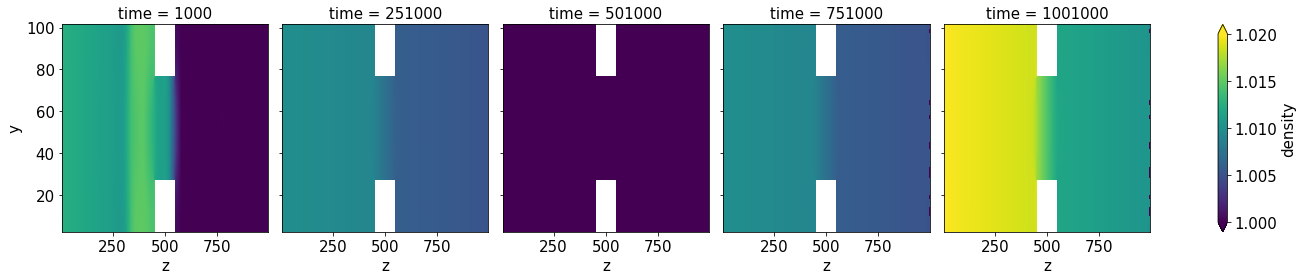

In [41]:
ds_re10pe1['density'].isel(time=[0, 50, 100, 150, 200]).isel(x=halfx_re10).plot(col='time', figsize=[20, 4], vmin=1.0, vmax=1.02)

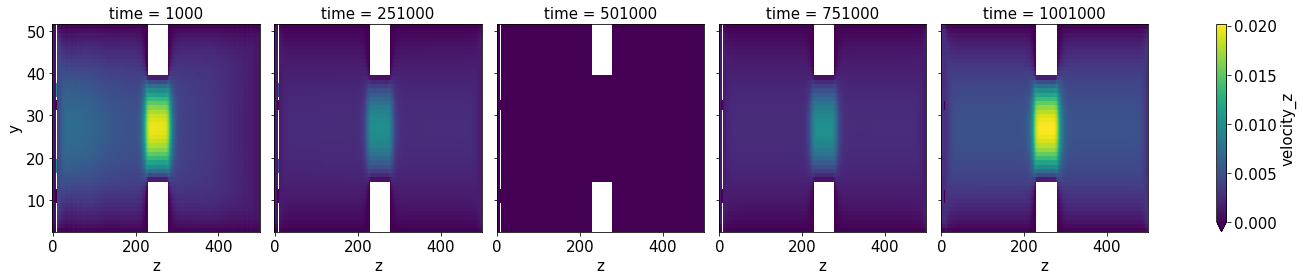

In [42]:
ds_re5pe1['velocity_z'].isel(time=[0, 50, 100, 150, 200]).isel(x=halfx_re5).plot(col='time', figsize=[20, 4], vmin=0)

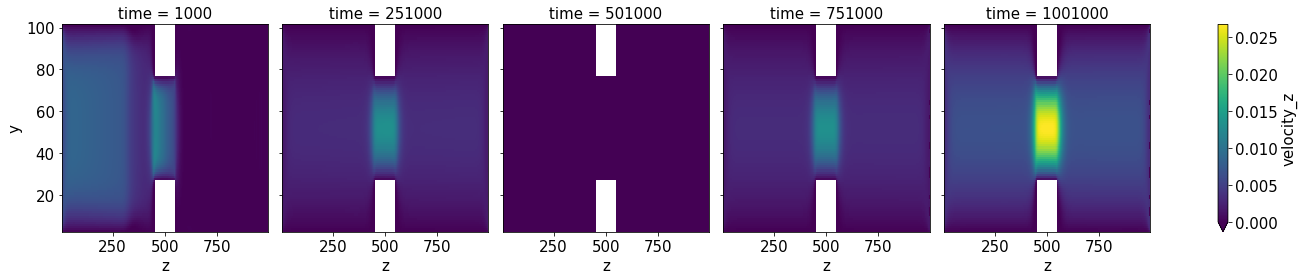

In [43]:
ds_re10pe1['velocity_z'].isel(time=[0, 50, 100, 150, 200]).isel(x=halfx_re10).plot(col='time', figsize=[20, 4], vmin=0)

### Drug field static y-z

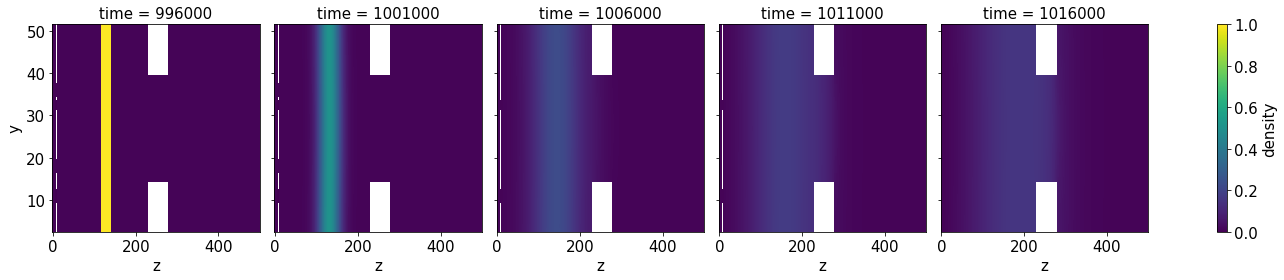

In [44]:
drug_re5pe1.isel(time=[199, 200, 201, 202, 203]).isel(x=halfx_re5).plot(col='time', figsize=[20, 4])

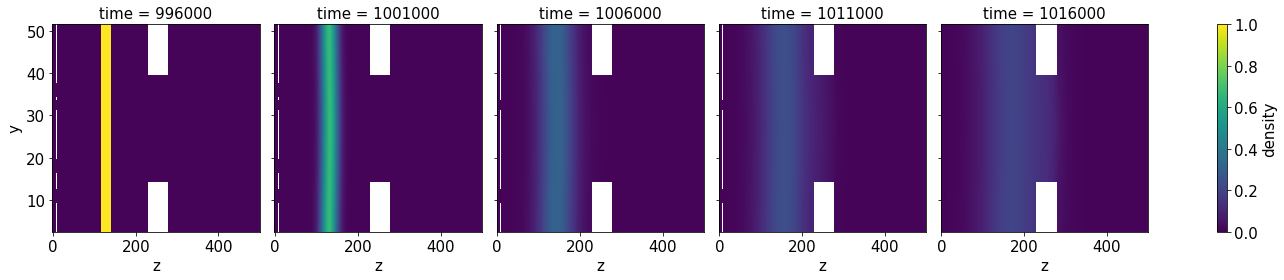

In [45]:
drug_re5pe3.isel(time=[199, 200, 201, 202, 203]).isel(x=halfx_re5).plot(col='time', figsize=[20, 4])

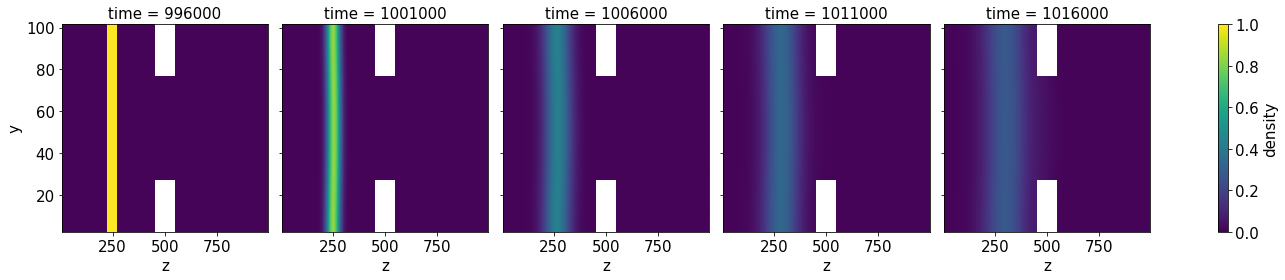

In [46]:
drug_re10pe1.isel(time=[199, 200, 201, 202, 203]).isel(x=halfx_re10).plot(col='time', figsize=[20, 4])

## Animation y-z plot

### Tweak plotting style blood field

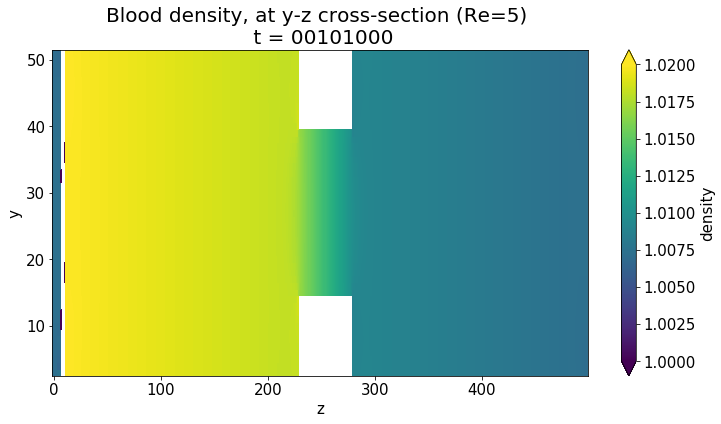

In [91]:
it = 20
ds_re5pe1['density'].isel(x=halfx_re5, time=it).plot(figsize=[12, 6], vmin=1.0, vmax=1.02, extend='both')
plt.title('Blood density, at y-z cross-section (Re=5) \n t = {0:08d}'.format(ds_re5pe1['time'].values[it]))
plt.savefig('test_density_re5.png', dpi=200)

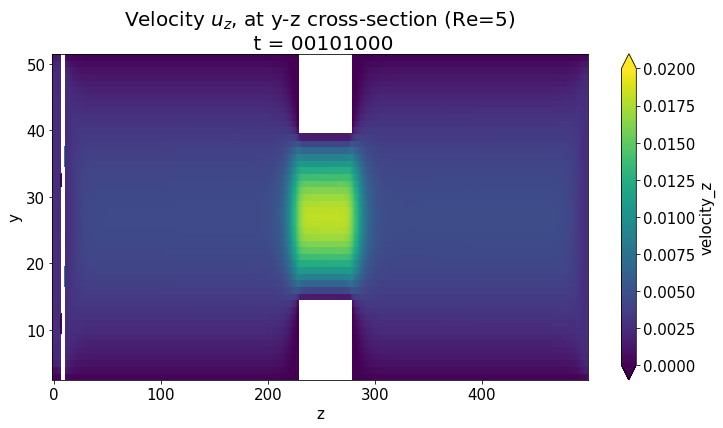

In [109]:
it = 20
ds_re5pe1['velocity_z'].isel(x=halfx_re5, time=it).plot(figsize=[12, 6], vmin=0.0, vmax=0.02, extend='both')
plt.title('Velocity $u_z$, at y-z cross-section (Re=5) \n t = {0:08d}'.format(ds_re5pe1['time'].values[it]))
plt.savefig('test_uz_re5.png', dpi=200)

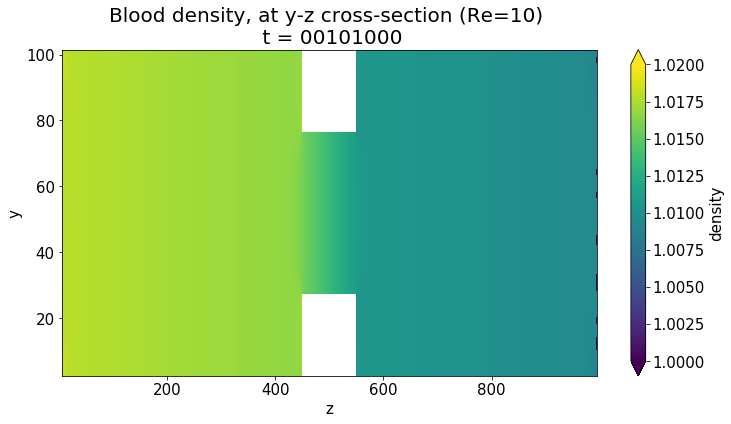

In [110]:
it = 20
ds_re10pe1['density'].isel(x=halfx_re10, time=it).plot(figsize=[12, 6], vmin=1.0, vmax=1.02, extend='both')
plt.title('Blood density, at y-z cross-section (Re=10) \n t = {0:08d}'.format(ds_re5pe1['time'].values[it]))
plt.savefig('test_density_re10.png', dpi=200)

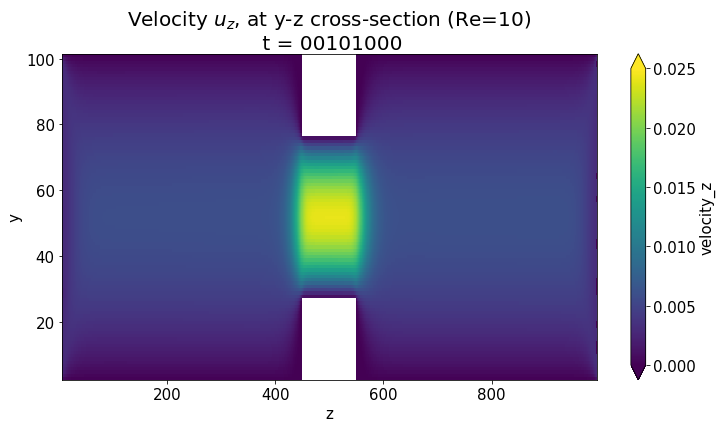

In [111]:
it = 20
ds_re10pe1['velocity_z'].isel(x=halfx_re10, time=it).plot(figsize=[12, 6], vmin=0.0, vmax=0.025, extend='both')
plt.title('Velocity $u_z$, at y-z cross-section (Re=10) \n t = {0:08d}'.format(ds_re10pe1['time'].values[it]))
plt.savefig('test_uz_re10.png', dpi=200)

### Generate animation blood field

In [114]:
# !rm -rf ./img/*  # clean up and re-plot

In [115]:
!mkdir -p ./img/yz_cross/re5pe1/density
!mkdir -p ./img/yz_cross/re5pe1/uz

In [116]:
%%time
for it in range(0, ds_re5pe1.sizes['time'], 4):
    print(it, end=' ')
    ds_re5pe1['density'].isel(x=halfx_re5, time=it).plot(figsize=[12, 6], vmin=1.0, vmax=1.02, extend='both')
    plt.title('Blood density, at y-z cross-section (Re=5) \n t = {0:08d}'.format(ds_re5pe1['time'].values[it]))
    plt.savefig('./img/yz_cross/re5pe1/density/density_{:03d}.png'.format(it))
    plt.close()
    
    ds_re5pe1['velocity_z'].isel(x=halfx_re5, time=it).plot(figsize=[12, 6], vmin=0.0, vmax=0.02, extend='both')
    plt.title('Velocity $u_z$, at y-z cross-section (Re=5) \n t = {0:08d}'.format(ds_re5pe1['time'].values[it]))
    plt.savefig('./img/yz_cross/re5pe1/uz/uz_{:03d}.png'.format(it))
    plt.close()

0 4 8 12 16 20 24 28 32 36 40 44 48 52 56 60 64 68 72 76 80 84 88 92 96 100 104 108 112 116 120 124 128 132 136 140 144 148 152 156 160 164 168 172 176 180 184 188 192 196 200 204 208 212 216 220 224 228 232 236 240 244 248 252 256 260 264 268 272 276 280 284 288 292 296 300 304 308 312 316 320 324 328 332 336 340 344 348 352 356 360 364 368 372 376 380 384 388 392 396 400 404 408 412 416 420 424 428 432 436 440 444 448 452 456 460 464 468 472 476 480 484 488 492 496 500 504 508 512 516 520 524 528 532 536 540 544 548 552 556 560 564 568 572 576 580 584 588 592 596 600 604 608 612 616 620 624 628 632 636 640 644 648 652 656 660 664 668 672 676 680 684 688 692 696 700 704 708 712 716 720 724 728 732 736 740 744 748 752 756 760 764 768 772 776 780 784 788 792 796 CPU times: user 2min 32s, sys: 9.2 s, total: 2min 41s
Wall time: 3min 12s


Then run `ffmpeg` at command line:

    mkdir -p movie
    
    # If file names are not continuous
    # https://video.stackexchange.com/questions/7300/how-to-get-ffmpeg-to-join-non-sequential-image-files-skip-by-3s
    ffmpeg -framerate 24 -pattern_type glob -i './img/yz_cross/re5pe1/density/density_*.png' -pix_fmt yuv420p ./movie/density_yz_re5pe1.mp4

No need to plot `re5pe3` as Peclet number does not change blood field.

In [117]:
!mkdir -p ./img/yz_cross/re10pe1/density
!mkdir -p ./img/yz_cross/re10pe1/uz

In [118]:
ds_re10pe1.sizes['time']

256

In [119]:
%%time
for it in range(0, ds_re10pe1.sizes['time'], 4):
    print(it, end=' ')
    ds_re10pe1['density'].isel(x=halfx_re10, time=it).plot(figsize=[12, 6], vmin=1.0, vmax=1.02, extend='both')
    plt.title('Blood density, y-z cross-section (Re=10) \n t = {0:08d}'.format(ds_re10pe1['time'].values[it]))
    plt.savefig('./img/yz_cross/re10pe1/density/density_{:03d}.png'.format(it))
    plt.close()
    
    ds_re10pe1['velocity_z'].isel(x=halfx_re10, time=it).plot(figsize=[12, 6], vmin=0.0, vmax=0.025, extend='both')
    plt.title('Velocity $u_z$, at y-z cross-section (Re=10) \n t = {0:08d}'.format(ds_re10pe1['time'].values[it]))
    plt.savefig('./img/yz_cross/re10pe1/uz/uz_{:03d}.png'.format(it))
    plt.close()

0 4 8 12 16 20 24 28 32 36 40 44 48 52 56 60 64 68 72 76 80 84 88 92 96 100 104 108 112 116 120 124 128 132 136 140 144 148 152 156 160 164 168 172 176 180 184 188 192 196 200 204 208 212 216 220 224 228 232 236 240 244 248 252 CPU times: user 43.8 s, sys: 13.3 s, total: 57.1 s
Wall time: 1min 9s


### Treak plotting style drug field

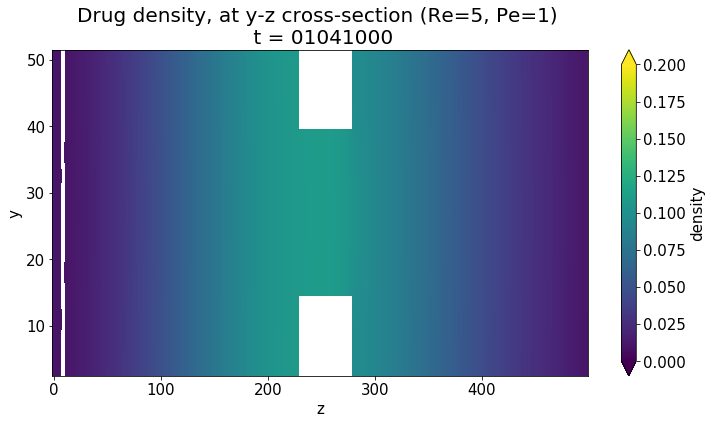

In [138]:
# [0, 0.2] is a good color scale for early steps
it = 208
drug_re5pe1.isel(x=halfx_re5, time=it).plot(figsize=[12, 6], vmin=0.0, vmax=0.2, extend='both')
plt.title('Drug density, at y-z cross-section (Re=5, Pe=1) \n t = {0:08d}'.format(ds_re5pe1['time'].values[it]))
plt.savefig('test_drug_re5pe1.png', dpi=200)

Text(0.5, 1.0, 'Drug density, at y-z cross-section (Re=5, Pe=1) \n t = 01501000')

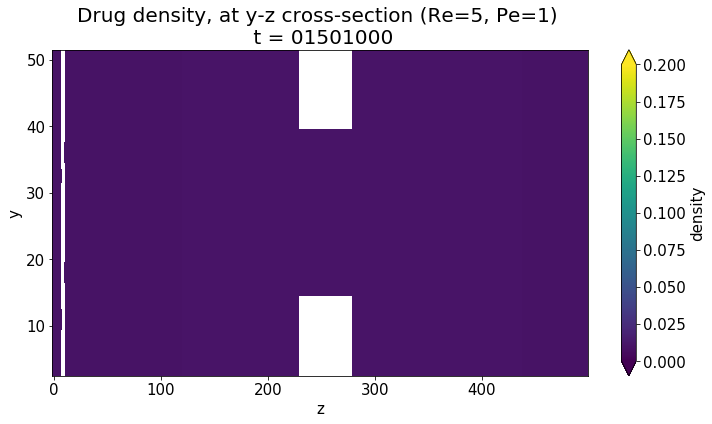

In [137]:
# [0, 0.2] is too large for later steps
it = 300
drug_re5pe1.isel(x=halfx_re5, time=it).plot(figsize=[12, 6], vmin=0.0, vmax=0.2, extend='both')
plt.title('Drug density, at y-z cross-section (Re=5, Pe=1) \n t = {0:08d}'.format(ds_re5pe1['time'].values[it]))

Text(0.5, 1.0, 'Drug density, at y-z cross-section (Re=5, Pe=1) \n t = 01501000')

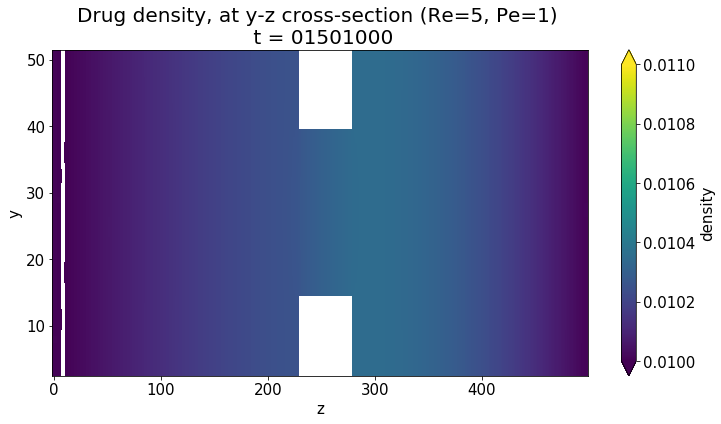

In [139]:
# [0.01, 0.011] is good for later steps
it = 300
drug_re5pe1.isel(x=halfx_re5, time=it).plot(figsize=[12, 6], vmin=0.010, vmax=0.011, extend='both')
plt.title('Drug density, at y-z cross-section (Re=5, Pe=1) \n t = {0:08d}'.format(ds_re5pe1['time'].values[it]))

**Other Pe and Re numbers**

Text(0.5, 1.0, 'Drug density, at y-z cross-section (Re=5, Pe=3) \n t = 01501000')

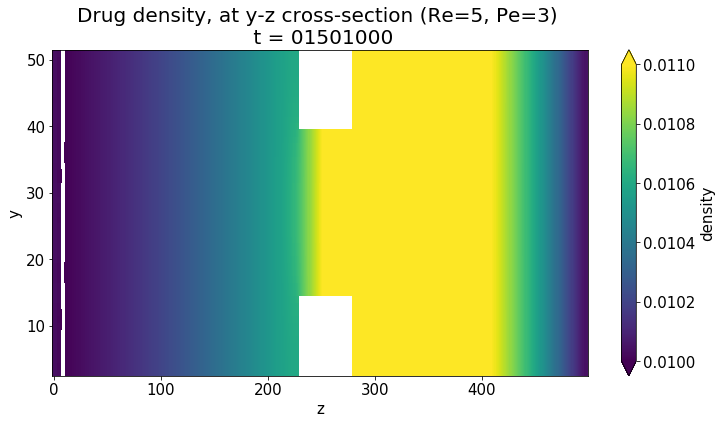

In [146]:
it = 300  # still not diffused out
drug_re5pe3.isel(x=halfx_re5, time=it).plot(figsize=[12, 6], vmin=0.010, vmax=0.011, extend='both')
plt.title('Drug density, at y-z cross-section (Re=5, Pe=3) \n t = {0:08d}'.format(ds_re5pe3['time'].values[it]))

Text(0.5, 1.0, 'Drug density, at y-z cross-section (Re=5, Pe=3) \n t = 02001000')

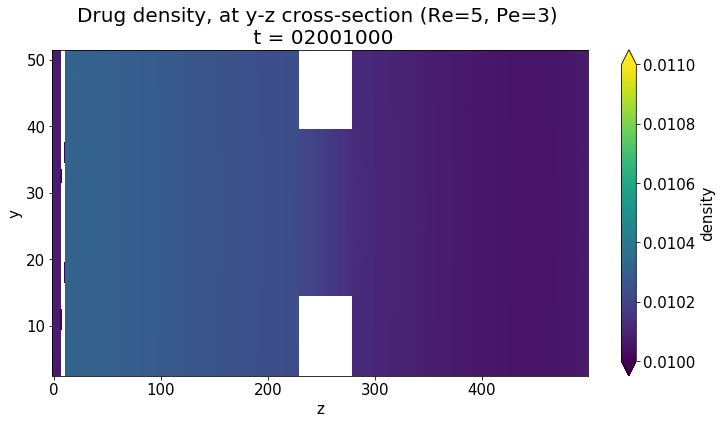

In [150]:
it = 400  # diffused out
drug_re5pe3.isel(x=halfx_re5, time=it).plot(figsize=[12, 6], vmin=0.010, vmax=0.011, extend='both')
plt.title('Drug density, at y-z cross-section (Re=5, Pe=3) \n t = {0:08d}'.format(ds_re5pe3['time'].values[it]))

Text(0.5, 1.0, 'Drug density, at y-z cross-section (Re=10, Pe=1) \n t = 01276000')

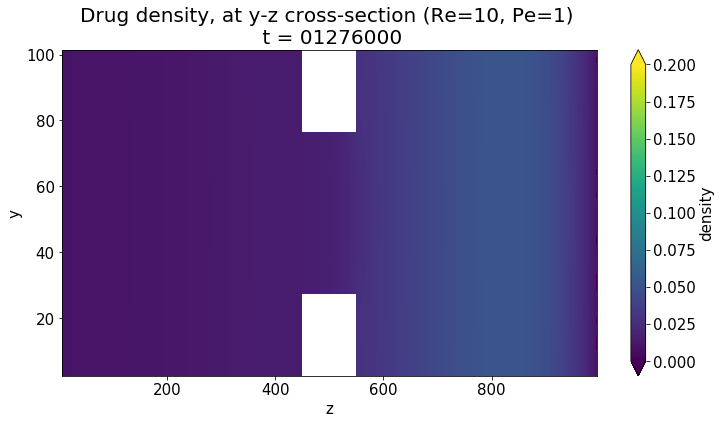

In [162]:
it = -1  # at the last step of simulation, drug is still visible with large color scale
drug_re10pe1.isel(x=halfx_re10, time=it).plot(figsize=[12, 6], vmin=0, vmax=0.2, extend='both')
plt.title('Drug density, at y-z cross-section (Re=10, Pe=1) \n t = {0:08d}'.format(ds_re10pe1['time'].values[it]))

### Generate animation drug field

**Re5 Pe1 case**

In [165]:
!mkdir -p ./img/yz_cross/re5pe1/drug/large_vrange  # for [0.0, 0.2]
!mkdir -p ./img/yz_cross/re5pe1/drug/small_vrange  # for [0.010, 0.011]

In [166]:
%%time
for it in range(0, drug_re5pe1.sizes['time'], 4):
    print(it, end=' ')
    
    # plot two color range at the same time to reduce disk I/O operation
    
    drug_re5pe1.isel(x=halfx_re5, time=it).plot(figsize=[12, 6], vmin=0.0, vmax=0.2, extend='both')
    plt.title('Drug density, at y-z cross-section (Re=5, Pe=1) \n t = {0:08d}'.format(drug_re5pe1['time'].values[it]))
    plt.savefig('./img/yz_cross/re5pe1/drug/large_vrange/drug_{:03d}.png'.format(it))
    plt.close()
    
    drug_re5pe1.isel(x=halfx_re5, time=it).plot(figsize=[12, 6], vmin=0.010, vmax=0.011, extend='both')
    plt.title('Drug density, at y-z cross-section (Re=5, Pe=1) \n t = {0:08d}'.format(drug_re5pe1['time'].values[it]))
    plt.savefig('./img/yz_cross/re5pe1/drug/small_vrange/drug_{:03d}.png'.format(it))
    plt.close()

0 4 8 12 16 20 24 28 32 36 40 44 48 52 56 60 64 68 72 76 80 84 88 92 96 100 104 108 112 116 120 124 128 132 136 140 144 148 152 156 160 164 168 172 176 180 184 188 192 196 200 204 208 212 216 220 224 228 232 236 240 244 248 252 256 260 264 268 272 276 280 284 288 292 296 300 304 308 312 316 320 324 328 332 336 340 344 348 352 356 360 364 368 372 376 380 384 388 392 396 400 404 408 412 416 420 424 428 432 436 440 444 448 452 456 460 464 468 472 476 480 484 488 492 496 500 504 508 512 516 520 524 528 532 536 540 544 548 552 556 560 564 568 572 576 580 584 588 592 596 600 604 608 612 616 620 624 628 632 636 640 644 648 652 656 660 664 668 672 676 680 684 688 692 696 700 704 708 712 716 720 724 728 732 736 740 744 748 752 756 760 764 768 772 776 780 784 788 792 796 CPU times: user 2min 27s, sys: 6.72 s, total: 2min 34s
Wall time: 3min 2s


**Re5 Pe3 case**

In [167]:
!mkdir -p ./img/yz_cross/re5pe3/drug/large_vrange  # for [0.0, 0.2]
!mkdir -p ./img/yz_cross/re5pe3/drug/small_vrange  # for [0.010, 0.011]

In [168]:
%%time
for it in range(0, drug_re5pe3.sizes['time'], 4):
    print(it, end=' ')
    
    drug_re5pe3.isel(x=halfx_re5, time=it).plot(figsize=[12, 6], vmin=0.0, vmax=0.2, extend='both')
    plt.title('Drug density, at y-z cross-section (Re=5, Pe=3) \n t = {0:08d}'.format(drug_re5pe3['time'].values[it]))
    plt.savefig('./img/yz_cross/re5pe3/drug/large_vrange/drug_{:03d}.png'.format(it))
    plt.close()
    
    drug_re5pe3.isel(x=halfx_re5, time=it).plot(figsize=[12, 6], vmin=0.010, vmax=0.011, extend='both')
    plt.title('Drug density, at y-z cross-section (Re=5, Pe=3) \n t = {0:08d}'.format(drug_re5pe3['time'].values[it]))
    plt.savefig('./img/yz_cross/re5pe3/drug/small_vrange/drug_{:03d}.png'.format(it))
    plt.close()

0 4 8 12 16 20 24 28 32 36 40 44 48 52 56 60 64 68 72 76 80 84 88 92 96 100 104 108 112 116 120 124 128 132 136 140 144 148 152 156 160 164 168 172 176 180 184 188 192 196 200 204 208 212 216 220 224 228 232 236 240 244 248 252 256 260 264 268 272 276 280 284 288 292 296 300 304 308 312 316 320 324 328 332 336 340 344 348 352 356 360 364 368 372 376 380 384 388 392 396 400 404 408 412 416 420 424 428 432 436 440 444 448 452 456 460 464 468 472 476 480 484 488 492 496 500 504 508 512 516 520 524 528 532 536 540 544 548 552 556 560 564 568 572 576 580 584 588 592 596 600 604 608 CPU times: user 1min 39s, sys: 4.75 s, total: 1min 44s
Wall time: 2min 5s


**Re10 Pe1 case**

In [173]:
!mkdir -p ./img/yz_cross/re10pe1/drug/large_vrange  # for [0.0, 0.2], no need to plot small scale

In [174]:
%%time
for it in range(0, drug_re10pe1.sizes['time'], 4):
    print(it, end=' ')
    
    # plot two color range at the same time to reduce disk I/O operation
    
    drug_re10pe1.isel(x=halfx_re10, time=it).plot(figsize=[12, 6], vmin=0.0, vmax=0.2, extend='both')
    plt.title('Drug density, at y-z cross-section (Re=10, Pe=1) \n t = {0:08d}'.format(drug_re10pe1['time'].values[it]))
    plt.savefig('./img/yz_cross/re10pe1/drug/large_vrange/drug_{:03d}.png'.format(it))
    plt.close()

0 4 8 12 16 20 24 28 32 36 40 44 48 52 56 60 64 68 72 76 80 84 88 92 96 100 104 108 112 116 120 124 128 132 136 140 144 148 152 156 160 164 168 172 176 180 184 188 192 196 200 204 208 212 216 220 224 228 232 236 240 244 248 252 CPU times: user 21.7 s, sys: 5.22 s, total: 26.9 s
Wall time: 39.1 s


# Plot stream line

## Static streamline

**Re=5 case**

In [228]:
it = 210
ds_slice_yz = ds_re5pe1.isel(time=it, x=halfx_re5).isel(z=slice(1, -1))  # remove the non-uniform boundary points
ds_slice_yz

<xarray.Dataset>
Dimensions:     (y: 49, z: 490)
Coordinates:
    x           int64 27
  * y           (y) int64 3 4 5 6 7 8 9 10 11 12 ... 43 44 45 46 47 48 49 50 51
  * z           (z) int64 6 7 8 9 10 11 12 13 ... 489 490 491 492 493 494 495
    time        int64 1051000
Data variables:
    density     (y, z) float32 dask.array<shape=(49, 490), chunksize=(49, 490)>
    velocity_x  (y, z) float32 dask.array<shape=(49, 490), chunksize=(49, 490)>
    velocity_y  (y, z) float32 dask.array<shape=(49, 490), chunksize=(49, 490)>
    velocity_z  (y, z) float32 dask.array<shape=(49, 490), chunksize=(49, 490)>

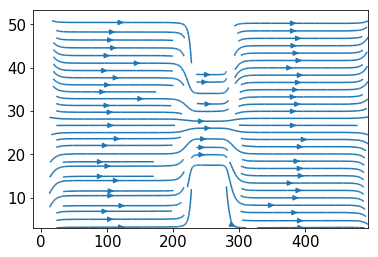

In [229]:
# a quick plot
plt.streamplot(ds_slice_yz['z'].values, ds_slice_yz['y'].values, 
               ds_slice_yz['velocity_z'].values, ds_slice_yz['velocity_y'].values)

CPU times: user 1.49 s, sys: 30.8 ms, total: 1.52 s
Wall time: 1.52 s


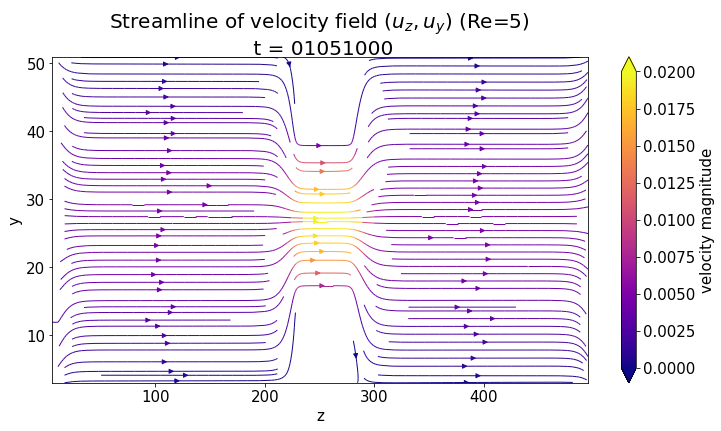

In [283]:
%%time
# More polished plotting style
# Ref: https://matplotlib.org/gallery/images_contours_and_fields/plot_streamplot.html

fig, ax = plt.subplots(1, 1, figsize=[12, 6])
strm = ax.streamplot(ds_slice_yz['z'].values, ds_slice_yz['y'].values, ds_slice_yz['velocity_z'].values, ds_slice_yz['velocity_y'].values,
                     linewidth=1.0, density=1.5, color=ds_slice_yz['velocity_z'].values, cmap='plasma', 
                     norm=matplotlib.colors.Normalize(vmin=0, vmax=0.02))
fig.colorbar(strm.lines, extend='both').set_label('velocity magnitude')

ax.set_xlabel('z'); ax.set_ylabel('y')
ax.set_xlim(ds_slice_yz['z'].min(), ds_slice_yz['z'].max()); ax.set_ylim(ds_slice_yz['y'].min(), ds_slice_yz['y'].max())

ax.set_title('Streamline of velocity field $(u_z, u_y)$ (Re=5) \n t = {0:08d}'.format(ds_re5pe1['time'].values[it]))

**Re=10 case**

CPU times: user 1.32 s, sys: 94.9 ms, total: 1.42 s
Wall time: 1.42 s


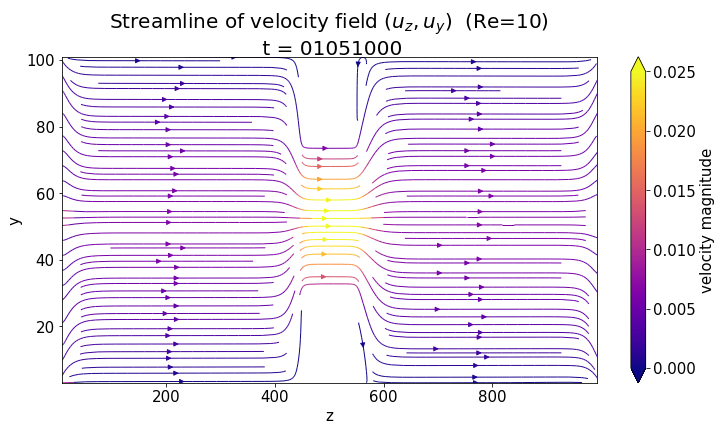

In [284]:
%%time

it = 210

# extract slice
ds_slice_yz = ds_re10pe1.isel(time=it, x=halfx_re10).isel(z=slice(1, -1))  # remove the non-uniform boundary points

fig, ax = plt.subplots(1, 1, figsize=[12, 6])
strm = ax.streamplot(ds_slice_yz['z'].values, ds_slice_yz['y'].values, ds_slice_yz['velocity_z'].values, ds_slice_yz['velocity_y'].values,
                     linewidth=1.0, density=1.5, color=ds_slice_yz['velocity_z'].values, cmap='plasma', 
                     norm=matplotlib.colors.Normalize(vmin=0, vmax=0.025))
fig.colorbar(strm.lines, extend='both').set_label('velocity magnitude')

ax.set_xlabel('z'); ax.set_ylabel('y')
ax.set_xlim(ds_slice_yz['z'].min(), ds_slice_yz['z'].max()); ax.set_ylim(ds_slice_yz['y'].min(), ds_slice_yz['y'].max())

ax.set_title('Streamline of velocity field $(u_z, u_y)$  (Re=10) \n t = {0:08d}'.format(ds_re10pe1['time'].values[it]))

## Animation streamline

**Re=5 case**

In [269]:
# !rm -rf ./img/yz_cross/re5pe1/streamline/*  # clean-up and re-plot

In [270]:
!mkdir -p ./img/yz_cross/re5pe1/streamline/

In [285]:
%%time

# plotting streamline is slow!

for it in range(0, ds_re5pe1.sizes['time'], 4):
    print(it, end=' ')
    
    # extract slice
    ds_slice_yz = ds_re5pe1.isel(time=it, x=halfx_re5).isel(z=slice(1, -1))  # remove the non-uniform boundary points
    
    fig, ax = plt.subplots(1, 1, figsize=[12, 6])
    strm = ax.streamplot(ds_slice_yz['z'].values, ds_slice_yz['y'].values, ds_slice_yz['velocity_z'].values, ds_slice_yz['velocity_y'].values,
                         linewidth=1.0, density=1.5, color=ds_slice_yz['velocity_z'].values, cmap='plasma', 
                         norm=matplotlib.colors.Normalize(vmin=0, vmax=0.02))
    fig.colorbar(strm.lines, extend='both').set_label('velocity magnitude')
    
    ax.set_xlabel('z'); ax.set_ylabel('y')
    ax.set_xlim(ds_slice_yz['z'].min(), ds_slice_yz['z'].max()); ax.set_ylim(ds_slice_yz['y'].min(), ds_slice_yz['y'].max())
    
    ax.set_title('Streamline of velocity field $(u_z, u_y)$  (Re=5) \n t = {0:08d}'.format(ds_re5pe1['time'].values[it]))
    fig.savefig('./img/yz_cross/re5pe1/streamline/streamline_{:03d}.png'.format(it))
    plt.close()

0 4 8 12 16 20 24 28 32 36 40 44 48 52 56 60 64 68 72 76 80 84 88 92 96 100 104 108 112 116 120 124 128 132 136 140 144 148 152 156 160 164 168 172 176 180 184 188 192 196 200 204 208 212 216 220 224 228 232 236 240 244 248 252 256 260 264 268 272 276 280 284 288 292 296 300 304 308 312 316 320 324 328 332 336 340 344 348 352 356 360 364 368 372 376 380 384 388 392 396 400 404 408 412 416 420 424 428 432 436 440 444 448 452 456 460 464 468 472 476 480 484 488 492 496 500 504 508 512 516 520 524 528 532 536 540 544 548 552 556 560 564 568 572 576 580 584 588 592 596 600 604 608 612 616 620 624 628 632 636 640 644 648 652 656 660 664 668 672 676 680 684 688 692 696 700 704 708 712 716 720 724 728 732 736 740 744 748 752 756 760 764 768 772 776 780 784 788 792 796 CPU times: user 5min 42s, sys: 7.45 s, total: 5min 49s
Wall time: 6min 30s


**Re=10 case**

In [274]:
!mkdir -p ./img/yz_cross/re10pe1/streamline/

In [286]:
%%time

# plotting streamline is slow!

for it in range(0, ds_re10pe1.sizes['time'], 4):
    print(it, end=' ')
    
    # extract slice
    ds_slice_yz = ds_re10pe1.isel(time=it, x=halfx_re10).isel(z=slice(1, -1))  # remove the non-uniform boundary points
    
    fig, ax = plt.subplots(1, 1, figsize=[12, 6])
    strm = ax.streamplot(ds_slice_yz['z'].values, ds_slice_yz['y'].values, ds_slice_yz['velocity_z'].values, ds_slice_yz['velocity_y'].values,
                         linewidth=1.0, density=1.5, color=ds_slice_yz['velocity_z'].values, cmap='plasma', 
                         norm=matplotlib.colors.Normalize(vmin=0, vmax=0.025))
    fig.colorbar(strm.lines, extend='both').set_label('velocity magnitude')
    
    ax.set_xlabel('z'); ax.set_ylabel('y')
    ax.set_xlim(ds_slice_yz['z'].min(), ds_slice_yz['z'].max()); ax.set_ylim(ds_slice_yz['y'].min(), ds_slice_yz['y'].max())
    
    ax.set_title('Streamline of velocity field $(u_z, u_y)$  (Re=10) \n t = {0:08d}'.format(ds_re10pe1['time'].values[it]))
    fig.savefig('./img/yz_cross/re10pe1/streamline/streamline_{:03d}.png'.format(it))
    plt.close()

0 4 8 12 16 20 24 28 32 36 40 44 48 52 56 60 64 68 72 76 80 84 88 92 96 100 104 108 112 116 120 124 128 132 136 140 144 148 152 156 160 164 168 172 176 180 184 188 192 196 200 204 208 212 216 220 224 228 232 236 240 244 248 252 CPU times: user 1min 46s, sys: 9.8 s, total: 1min 56s
Wall time: 2min 7s


# Integral of drug density

## Identify the narrowing region

In [ ]:
drug_re5pe1.sel(z=slice(228, 280)).isel(x=halfx_re5, time=200).plot()

In [ ]:
drug_re5pe1.sel(z=slice(229, 279)).isel(x=halfx_re5, time=200).plot()

In [ ]:
# drug_re10pe1.sel(z=slice(449, 551)).isel(x=halfx_re10, time=200).plot()

## Integrate

In [ ]:
with ProgressBar():
    integral_re5pe1 = drug_re5pe1.sel(z=slice(229, 279)).sum(dim=['x', 'y', 'z']).compute()

In [ ]:
with ProgressBar():
    integral_re5pe3 = drug_re5pe3.sel(z=slice(229, 279)).sum(dim=['x', 'y', 'z']).compute()

In [ ]:
integral_re5pe1.plot(figsize=[12, 6])
integral_re5pe3.plot()

# Drug profile evolution

In [ ]:
with ProgressBar():
    profile_re5pe1 = drug_re5pe1.isel(time=210).mean(dim=['x', 'y']).compute()

In [ ]:
profile_re5pe1.plot()

In [ ]:
with ProgressBar():
    profile_2d_re5pe1 = drug_re5pe1.sum(dim=['x', 'y']).compute()

In [ ]:
profile_2d_re5pe1.plot()

In [ ]:
profile_2d_re5pe1.isel(time=slice(200, 220)).plot()

# Schlierin vizualization

# x-z cross section

In [ ]:
ds_re5pe1['velocity_z'].isel(time=[0, 50, 100, 150, 200]).isel(z=200).plot(col='time', figsize=[20, 4], vmin=0)

In [ ]:
ds_re10pe1['velocity_z'].isel(time=[0, 50, 100, 150, 200]).isel(z=200).plot(col='time', figsize=[20, 4], vmin=0)

In [ ]:
ds_re5pe1['velocity_x'].isel(time=[0, 50, 100, 150, 200]).isel(z=223).plot(col='time', figsize=[20, 4], vmin=0)

In [ ]:
ds_re5pe1['velocity_y'].isel(time=[0, 50, 100, 150, 200]).isel(z=223).plot(col='time', figsize=[20, 4], vmin=0)

In [ ]:
ds_re5pe1['velocity_y'].isel(time=[0, 50, 100, 150, 200]).isel(z=224).plot(col='time', figsize=[20, 4], vmin=0)

In [ ]:
ds_slice_xy = ds_re5pe1.isel(time=200, z=220)
ds_slice_xy

In [ ]:
plt.streamplot(ds_slice_xy['x'].values, ds_slice_xy['y'].values, 
               ds_slice_xy['velocity_x'].values, ds_slice_xy['velocity_y'].values)